<h1> My Coursera Capstone Project <h2>

<h3> Predicting the Severity of a Potential Accident <h3>

This notebook will be mainly used for the Coursera capstone project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


<b> Cross - industry standart process for data mining <b>

Business Understanding:
The initial phase is to understand the project's objective from the business or application perspective. Then, you need to translate this knowledge into a machine learning problem with a preliminary plan to achieve the objectives.

Data understanding:
In this phase, you need to collect or extract the dataset from various sources such as csv file or SQL database. Then, you need to determine the attributes (columns) that you will use to train your machine learning model. Also, you will assess the condition of chosen attributes by looking for trends, certain patterns, skewed information, correlations, and so on.

Data Preparation:
The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation can be performed multiple times and it includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset.

Modeling:
In this phase, various algorithms and methods can be selected and applied to build the model including supervised machine learning techniques. You can select SVM, XGBoost, decision tree, or any other techniques. You can select a single or multiple machine learning models for the same data mining problem. At this phase, stepping back to the data preparation phase is often required.

Evaluation:
Before proceeding to the deployment stage, the model needs to be evaluated thoroughly to ensure that the business or the applications' objectives are achieved. Certain metrics can be used for the model evaluation such as accuracy, recall, F1-score, precision, and others.

Deployment:
The deployment phase requirements vary from project to project. It can be as simple as creating a report, developing interactive visualization, or making the machine learning model available in the production environment. In this environment, the customers or end-users can utilize the model in different ways such as API, website, or so on.

<b> About the Data <b>

This data set is about accident (car collisions) severity. This data includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. The data dates weekly from 2004 to present. The data has been collected from the Seattle Department of Transportation.

All collisions provided by SPD and recorded by Traffic Records. 

This includes all types of collisions. Collisions will display at the intersection or
mid-block of a segment. Timeframe: 2004 to Present.

<b> Load Data from CSV file <b>

In [5]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_44f0ef5f89114190a3f8117356623d0b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ux_SKFYCXR8fp7wko9Gz1Qgk9qedKgvfc0xuIDiv9iDm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_44f0ef5f89114190a3f8117356623d0b.get_object(Bucket='courseracapstoneproject-donotdelete-pr-bjribzfx0r9lcg',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head()



,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df_1.shape

(194673, 38)

This data set contains 194673 rows. There are 37 attributes, some numeric and some categorical. Some attributes have missing data. This is not a balanced labeled dataset.

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

Delete columns which contains large amount of missing data

In [8]:
df_1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Next, we will keep only values that we really need for analysis to make analysis simple:

In [9]:
df_1 = df_1[['SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']] 

In [10]:
df_1.dropna(subset=['SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], inplace = True)

In [11]:
df_1.reset_index(inplace = True, drop = True)

In [12]:
df_1.shape

(187525, 5)

In [13]:
df_1.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Overcast,Wet,Daylight
1,1,Block,Raining,Wet,Dark - Street Lights On
2,1,Block,Overcast,Dry,Daylight
3,1,Block,Clear,Dry,Daylight
4,2,Intersection,Raining,Wet,Daylight


In [14]:
df_1['SEVERITYCODE'].unique()

array([2, 1])

In [15]:
df_1['SEVERITYCODE'].value_counts()

1    130642
2     56883
Name: SEVERITYCODE, dtype: int64

<h2> First look at the data <h2> 

<h3> ~Types of severity <h3>

Text(0, 0.5, 'Collision counts')

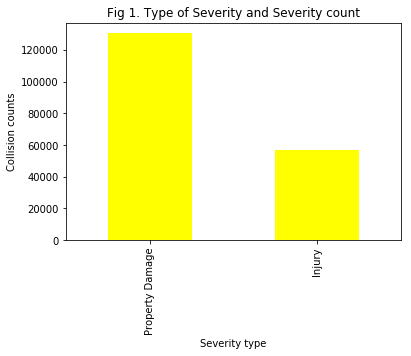

In [16]:
fig, ax = plt.subplots()
df_1['SEVERITYCODE'].value_counts().plot(ax=ax, kind='bar', color='yellow')
plt.title('Fig 1. Type of Severity and Severity count')
plt.xlabel('Severity type')
plt.xticks(rotation = 90)
plt.xticks(np.arange(2), ['Property Damage', 'Injury'])  # Set text labels
plt.ylabel('Collision counts')

<b> From the Fig.1 we can clearly see that in most of collision cases property was damaged. In almost half of collisions injuries took place. <b>

In [19]:
#Drop rows with unknown values
df_1.drop(df_1[(df_1['SEVERITYCODE'] == '0') | (df_1['WEATHER'] == 'Unknown') 
           | (df_1['ROADCOND'] == 'Unknown') | (df_1['LIGHTCOND'] == 'Unknown')].index, inplace = True) 

<h3> ~Where the most of collisions took place? <h3>

In [20]:
df_1['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [21]:
df_1['ADDRTYPE'].value_counts()

Block           107780
Intersection     61406
Alley              595
Name: ADDRTYPE, dtype: int64

Text(0, 0.5, 'Collision count')

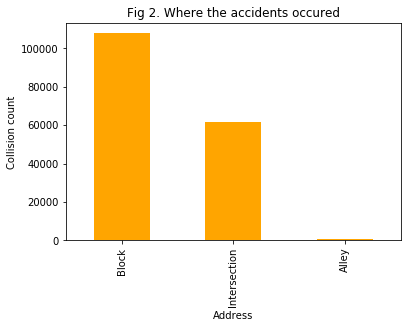

In [22]:
fig, ax = plt.subplots()
df_1['ADDRTYPE'].value_counts().plot(ax=ax, kind='bar', color = 'orange')
plt.title('Fig 2. Where the accidents occured')
plt.xlabel('Address')
plt.ylabel('Collision count')

<b> From the Fig.2 we can see that most of the accidents occured in the blocks, less accident occured at the intersections. Least accidents occured at the alley. <b>

<h3> ~Weather condition influence to accidents <h3>

In [23]:
df_1['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', 'Snowing', 'Other',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [24]:
df_1['WEATHER'].value_counts()

Clear                       108507
Raining                      32599
Overcast                     26863
Snowing                        827
Fog/Smog/Smoke                 549
Other                          253
Sleet/Hail/Freezing Rain       110
Blowing Sand/Dirt               43
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Text(0, 0.5, 'Collision counts')

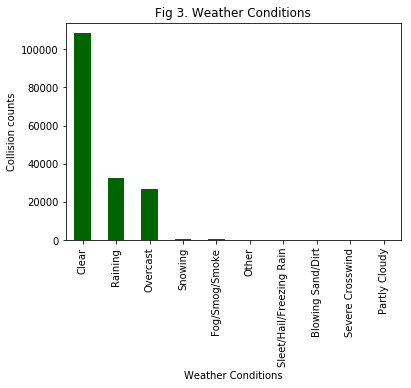

In [25]:
fig, ax = plt.subplots()
df_1['WEATHER'].value_counts().plot(ax=ax, kind='bar', color='darkgreen')
plt.title('Fig 3. Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Collision counts')

<b> From the Fig.3 we can see that most of the accidents occured in the good weather conditions <b>

Most accidents happened in the 'clear' weather condition.

<h3> ~Road condition influence to accidents <h3>

In [26]:
df_1['ROADCOND'].unique()

array(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'], dtype=object)

In [27]:
df_1['ROADCOND'].value_counts()

Dry               121233
Wet                46284
Ice                 1088
Snow/Slush           841
Other                105
Standing Water       104
Sand/Mud/Dirt         65
Oil                   61
Name: ROADCOND, dtype: int64

Text(0, 0.5, 'Collision counts')

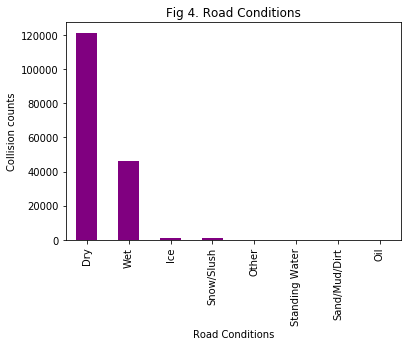

In [28]:
fig, ax = plt.subplots()
df_1['ROADCOND'].value_counts().plot(ax=ax, kind='bar', color='purple')
plt.title('Fig 4. Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Collision counts')

<b> In Fig. 4 we can see that most of collisions happened at the dry road conditions. <b>

<h3> ~Light Conditions <h3>

In [29]:
df_1['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

In [30]:
df_1['LIGHTCOND'].value_counts()

Daylight                    112339
Dark - Street Lights On      46681
Dusk                          5623
Dawn                          2415
Dark - No Street Lights       1408
Dark - Street Lights Off      1112
Other                          194
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

Text(0, 0.5, 'Collision counts')

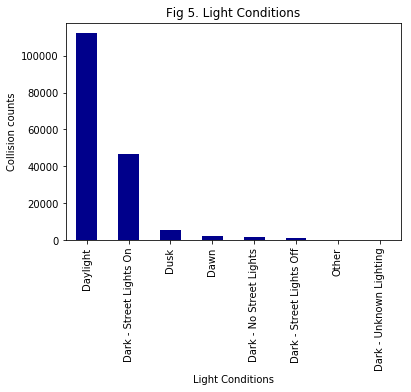

In [31]:
fig, ax = plt.subplots()
df_1['LIGHTCOND'].value_counts().plot(ax=ax, kind='bar', color='darkblue')
plt.title('Fig 5. Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Collision counts')

<b> From the Fig. 5. we can see that most accidents happened in the daylight. That can happen because of most of the traffic happens also in the daylight. <b>

People goes to jobs, schools and so on.

<h3> ~Light and Road condition influence to the accidents <h3>

In [32]:
df_1.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts()

SEVERITYCODE  LIGHTCOND               
1             Daylight                    74294
              Dark - Street Lights On     32415
              Dusk                         3722
              Dawn                         1606
              Dark - No Street Lights      1084
              Dark - Street Lights Off      803
              Other                         145
              Dark - Unknown Lighting         5
2             Daylight                    38045
              Dark - Street Lights On     14266
              Dusk                         1901
              Dawn                          809
              Dark - No Street Lights       324
              Dark - Street Lights Off      309
              Other                          49
              Dark - Unknown Lighting         4
Name: LIGHTCOND, dtype: int64

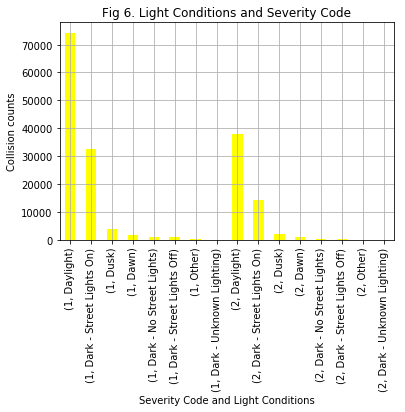

In [37]:
data = df_1.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts()
data.plot.bar(color='yellow')
plt.title('Fig 6. Light Conditions and Severity Code')
plt.xlabel('Severity Code and Light Conditions')
plt.ylabel('Collision counts')
plt.grid()

In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [40]:
df_1.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()

SEVERITYCODE  ROADCOND      
1             Dry               81608
              Wet               30739
              Ice                 823
              Snow/Slush          685
              Standing Water       75
              Other                63
              Sand/Mud/Dirt        44
              Oil                  37
2             Dry               39625
              Wet               15545
              Ice                 265
              Snow/Slush          156
              Other                42
              Standing Water       29
              Oil                  24
              Sand/Mud/Dirt        21
Name: ROADCOND, dtype: int64

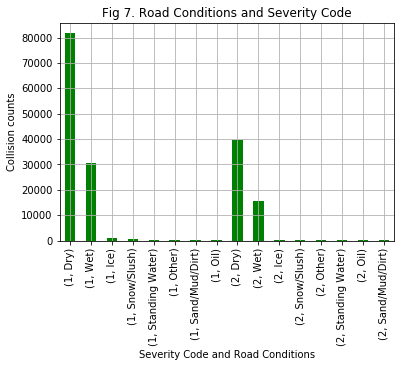

In [42]:
data = df_1.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()
data.plot.bar(color='green')
plt.title('Fig 7. Road Conditions and Severity Code')
plt.xlabel('Severity Code and Road Conditions')
plt.ylabel('Collision counts')
plt.grid()

<h3> ~Machine Learning Algorithms <h3>

In [44]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn.metrics import log_loss

In [46]:
#Assign numerical labels to categorical variables
le = preprocessing.LabelEncoder()
df_1['SEVERITYCODE'] = le.fit_transform(df_1['SEVERITYCODE'])
df_1['ADDRTYPE'] = le.fit_transform(df_1['ADDRTYPE'])
df_1['WEATHER'] = le.fit_transform(df_1['WEATHER'])
df_1['ROADCOND'] = le.fit_transform(df_1['ROADCOND'])
df_1['LIGHTCOND'] = le.fit_transform(df_1['LIGHTCOND'])
df_1['SEVERITYCODE'] = le.fit_transform(df_1['SEVERITYCODE'])

In [48]:
X = df_1[['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
X = preprocessing.StandardScaler().fit(X).transform(X)
X

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 1.31868379,  0.72405355,  1.61970963,  0.60432071],
       [-0.73589502,  1.68000096,  1.61970963, -1.47611378],
       [-0.73589502,  0.72405355, -0.62419989,  0.60432071],
       ...,
       [ 1.31868379, -0.70986757, -0.62419989,  0.60432071],
       [ 1.31868379, -0.70986757, -0.62419989,  1.29779887],
       [-0.73589502, -0.70986757,  1.61970963,  0.60432071]])

In [49]:
y = np.asarray(df_1['SEVERITYCODE'])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (118846, 4) (118846,)
Test set: (50935, 4) (50935,)


<h3> SVM - Support Vector Machine <h3>

In [52]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
yhat_clf = clf.predict(X_test)
yhat_clf

array([0, 0, 0, ..., 0, 0, 0])

<h3> KNN - K-Nearest Neighbors <h3>

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
k = 8
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [57]:
yhat_kn = neigh.predict(X_test)
yhat_kn

array([0, 0, 0, ..., 0, 0, 1])

<h3> Logistic Regression <h3>

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris


In [69]:
LR = LogisticRegression(C=0.01, max_iter=1000)
LR.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
yhat_LR = LR.predict(X_test)
yhat_LR

array([0, 0, 0, ..., 0, 0, 0])

<h3> Decision Tree <h3>

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
predTree = Tree.predict(X_test)
predTree

array([0, 0, 0, ..., 0, 0, 0])

<h1> Evaluation and Conclusions <h1>

<h3> 1. SVM <h3

In [74]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_clf))
f1_score(y_test, yhat_clf, average='weighted')

Train set Accuracy:  0.6705736835905289
Test set Accuracy:  0.6749582801609895


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5439761519482067

In [75]:
jaccard_similarity_score(y_test, yhat_clf)

0.6749582801609895

In [76]:
print (classification_report(y_test, yhat_clf))

              precision    recall  f1-score   support

           0       0.67      1.00      0.81     34379
           1       0.00      0.00      0.00     16556

   micro avg       0.67      0.67      0.67     50935
   macro avg       0.34      0.50      0.40     50935
weighted avg       0.46      0.67      0.54     50935



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h3> 2. K-Nearest Neighbors <h3>

In [77]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_kn))

Train set Accuracy:  0.6439678239065681
Test set Accuracy:  0.6485520761755178


In [78]:
f1_score(y_test, yhat_kn, average='weighted')

0.569147768353061

In [79]:
jaccard_similarity_score(y_test, yhat_kn)

0.6485520761755178

In [80]:
print (classification_report(y_test, yhat_kn))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78     34379
           1       0.33      0.08      0.13     16556

   micro avg       0.65      0.65      0.65     50935
   macro avg       0.51      0.50      0.46     50935
weighted avg       0.56      0.65      0.57     50935



<h3> 3. Logistic Regression <h3>

In [81]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))

Train set Accuracy:  0.6705736835905289
Test set Accuracy:  0.6749582801609895


In [82]:
f1_score(y_test, yhat_LR, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5439761519482067

In [84]:
jaccard_similarity_score(y_test, yhat_LR)

0.6749582801609895

In [85]:
print(classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

           0       0.67      1.00      0.81     34379
           1       0.00      0.00      0.00     16556

   micro avg       0.67      0.67      0.67     50935
   macro avg       0.34      0.50      0.40     50935
weighted avg       0.46      0.67      0.54     50935



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.613413882157732

<h3> 4. Decision Tree <h3>

In [87]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Tree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

Train set Accuracy:  0.6705989263416522
Test set Accuracy:  0.6749386472955727


In [88]:
f1_score(y_test, predTree, average='weighted')

0.5440028927813242

In [89]:
jaccard_similarity_score(y_test, predTree)

0.6749386472955727

In [90]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.67      1.00      0.81     34379
           1       0.33      0.00      0.00     16556

   micro avg       0.67      0.67      0.67     50935
   macro avg       0.50      0.50      0.40     50935
weighted avg       0.56      0.67      0.54     50935



1. Most of accidents happened in the daylight, dry road conditions. That concludes that most of accidents happens because of human influence (not paying attention, lack of sleep and so on).

2. The four models we built are all very similar in terms of prediction and accuracy. 

3. The highest prediction accuracy is about 67.49%. 

4. Most accurate model was "Suppor Vector Machine", "Logistic Regression"  and "Decision Tree".

5. In this project, we have found the major environmental factors and road conditions that affect car accidents. Also we found a building a model that can help predict the severity of car accidents based on these conditions.

6. Data was cleaned and prepared for data analysis and model building.

7.  Based on the data analysis and results, we can make some recommendations to improve the safety of drivers, pedestrians and others. Most helpful advice would be to pay attention and to watch the signs.